In [1]:
#study data
obs     = 'mms1'
year    = '2017'
month   = '06'
day     = '08'
basedir = '/fpiprd1/fpishare/Conrad/'
basedir = 'c:/Yuggoth/'

In [3]:
sys.path.append('c:/Users/Conrad/Documents/GitHub/PAD/src/')
import Burst_Munger as munge
import Grapher
import PAD

In [4]:
epoch_strings = ['20170608133933',
                 '20170608134133',
                 '20170608134403',
                 '20170608134623',
                 '20170608134853',
                 '20170608135003',
                 '20170608135133',
                 '20170608135353',
                 '20170608135623',
                 '20170608135803',
                 '20170608135943',
                 '20170608140143',
                 '20170608140353',
                 '20170608140603',
                 '20170608140813',
                 '20170608141033',
                 '20170608141243',
                 '20170608141453',
                 '20170608141703',
                 '20170608141923',
                 '20170608142133',
                 '20170608142303',
                 '20170608143333',
                 '20170608143453']

In [6]:
munge.fpi_emoms_dir

''

In [5]:
munge.config_directories(basedir,obs,year,month,day)
Be   = munge.munge_moms(epoch_strings,'des')
Bi   = munge.munge_moms(epoch_strings,'dis')
Bfgm = munge.munge_fgm(epoch_strings)

*

CDFError: NO_SUCH_CDF: The specified CDF does not exist.

In [14]:
fpi_emoms_dir

'c:/Yuggoth/mms1/fpi/brst/l2/des-moms/2017/06/08/'

* * * * * * * * * * * * * * * * * * * * * * * *


In [18]:
des_ergs = Be[0]['ergs'][0,:]
dis_ergs = Bi[0]['ergs'][0,:]

C:\Users\Conrad\Anaconda2\lib\site-packages\ipykernel\__main__.py:6: RuntimeWarning: divide by zero encountered in log10


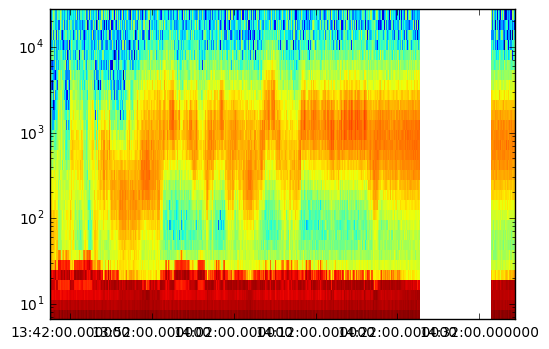

In [41]:
fig = plt.figure()
ax  = fig.add_subplot(1,1,1)


for be in Be:
    Qe = np.ma.masked_invalid(np.log10(be['omnis'])).T
    patch = ax.pcolormesh(be['epochs'],des_ergs,Qe)
ax.set_ylim([des_ergs[0],des_ergs[-1]])
ax.set_yscale('log')

C:\Users\Conrad\Anaconda2\lib\site-packages\ipykernel\__main__.py:6: RuntimeWarning: divide by zero encountered in log10


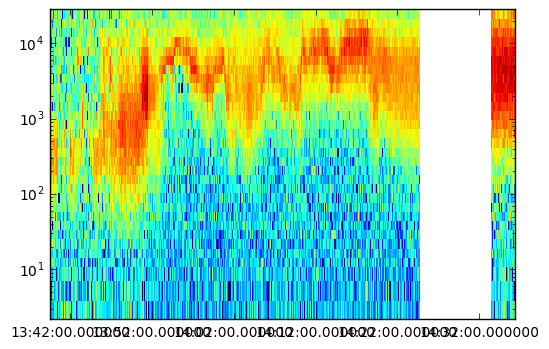

In [20]:
fig = plt.figure()
ax  = fig.add_subplot(1,1,1)


for bi in Bi:
    Qi = np.ma.masked_invalid(np.log10(bi['omnis'])).T
    patch = ax.pcolormesh(bi['epochs'],dis_ergs,Qi)
ax.set_ylim([dis_ergs[0],dis_ergs[-1]])
ax.set_yscale('log')

In [19]:
Bfgm[0].keys()

['num_brsts', 'name', 'Bgse', 'stop', 'epochs', 'start', 'Bgsm']

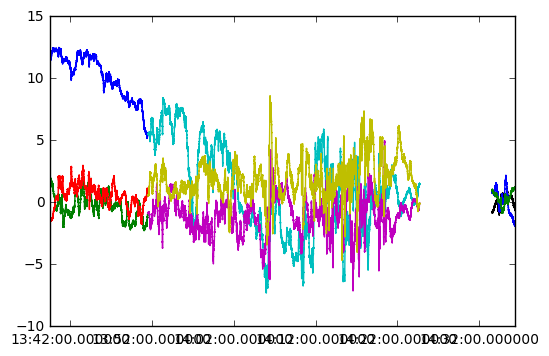

In [20]:
fig = plt.figure()
ax  = fig.add_subplot(1,1,1)

for bf in Bfgm:
    ax.plot(bf['epochs'],bf['Bgse'][:,0])
    ax.plot(bf['epochs'],bf['Bgse'][:,1])
    ax.plot(bf['epochs'],bf['Bgse'][:,2])    
#ax.set_ylim([dis_ergs[0],dis_ergs[-1]])
#ax.set_yscale('log')
#for bf in Bfgm:
    

In [13]:
bpsd_f = bpsd_dir+'mms1_dsp_fast_l2_bpsd_20170608_v2.2.3.cdf'
epsd_f = epsd_dir+'mms1_dsp_fast_l2_epsd_20170608_v0.6.3.cdf'

In [14]:
bpsd       = pycdf.CDF(bpsd_f)
epsd       = pycdf.CDF(epsd_f)
bpsd_Epoch = np.asarray(bpsd['Epoch'])
bpsd_freq  = np.asarray(bpsd['mms1_b_freq'][:])
epsd_Epoch = np.asarray(epsd['Epoch'])
epsd_freq  = np.asarray(epsd['mms1_e_freq'][:])
bpsd_omni  = np.ma.masked_invalid(np.log10(np.asarray(bpsd['mms1_dsp_bpsd_omni_fast_l2']))).T
epsd_omni  = np.ma.masked_invalid(np.log10(np.asarray(epsd['mms1_dsp_epsd_omni']))).T

C:\Users\Conrad\Anaconda2\lib\site-packages\ipykernel\__main__.py:8: RuntimeWarning: divide by zero encountered in log10
C:\Users\Conrad\Anaconda2\lib\site-packages\ipykernel\__main__.py:9: RuntimeWarning: divide by zero encountered in log10


In [17]:
bpsd.close()
epsd.close()

In [26]:
obs     = 'mms1'
species = 'dis'
counter = 0
data    = []
for e in epoch_strings:
    dis_f = dis_brst_path+dis_pre+e+dis_post
    fgm_f = fgm_brst_path+fgm_pre+e+fgm_post
    dis   = pycdf.CDF(dis_f)
    fgm   = pycdf.CDF(fgm_f)
    temp   = pack_brst_struct(dis,fgm,'mms1','dis')
    data.append(temp)
    print str(counter)+'-',
    counter += 1
    dis.close()
    fgm.close()

NameError: name 'dis_brst_path' is not defined

/opt/fpi/anaconda2_4.4.0/lib/python2.7/site-packages/ipykernel/__main__.py:25: RuntimeWarning: divide by zero encountered in log10


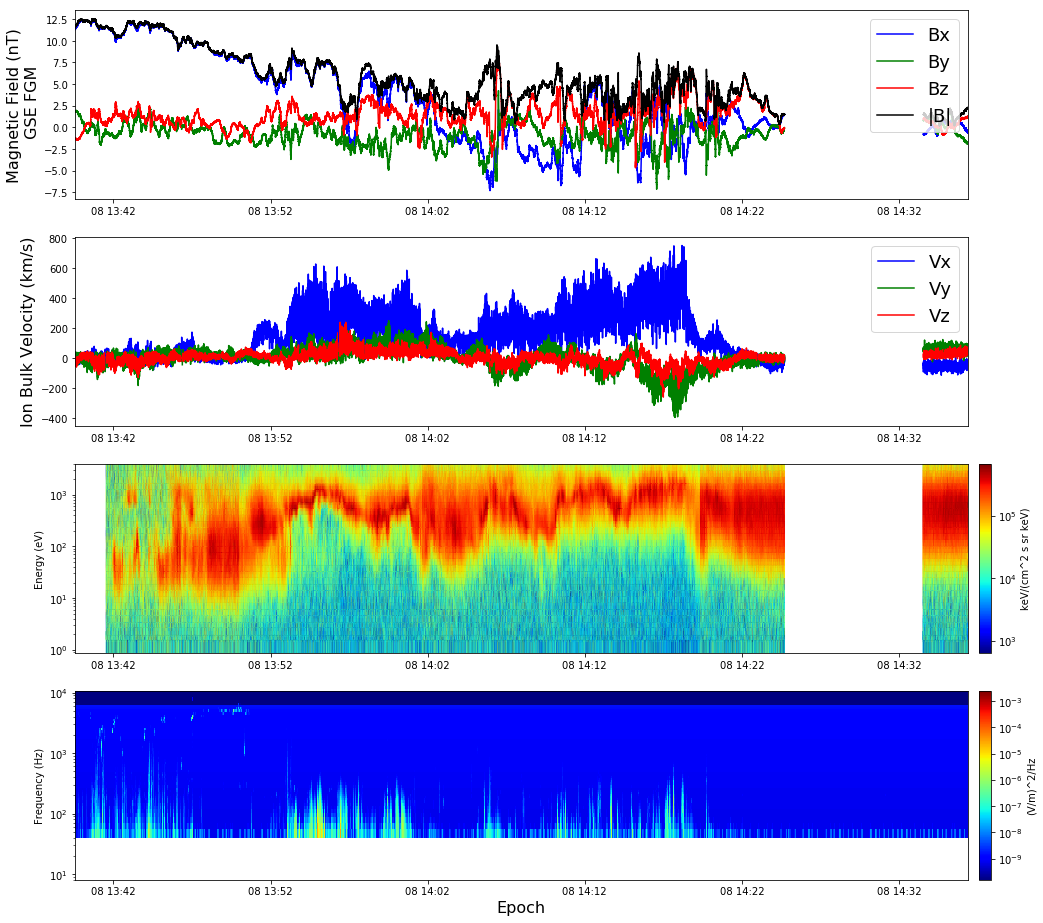

In [10]:
fig  = plt.figure(figsize=(16,16))
ax1  = fig.add_subplot(4,1,1)
ax2  = fig.add_subplot(4,1,2,sharex=ax1)
ax3  = fig.add_subplot(4,1,3,sharex=ax1)
ax4  = fig.add_subplot(4,1,4,sharex=ax1)
flag = 0
for d in data:
    if flag == 0:
        ax1.plot(d['fgm_Epoch'],d['b_gse_brst'][:,0],'b-',label='Bx')
        ax1.plot(d['fgm_Epoch'],d['b_gse_brst'][:,1],'g-',label='By')
        ax1.plot(d['fgm_Epoch'],d['b_gse_brst'][:,2],'r-',label='Bz')
        ax1.plot(d['fgm_Epoch'],d['b_gse_brst'][:,3],'k-',label='|B|')        
        ax2.plot(d['dis_Epoch'],d['bulk_v'][:,0],'b-',label='Vx')
        ax2.plot(d['dis_Epoch'],d['bulk_v'][:,1],'g-',label='Vy')
        ax2.plot(d['dis_Epoch'],d['bulk_v'][:,2],'r-',label='Vz')
        flag = 1
    else:
        ax1.plot(d['fgm_Epoch'],d['b_gse_brst'][:,0],'b-')
        ax1.plot(d['fgm_Epoch'],d['b_gse_brst'][:,1],'g-')
        ax1.plot(d['fgm_Epoch'],d['b_gse_brst'][:,2],'r-')
        ax1.plot(d['fgm_Epoch'],d['b_gse_brst'][:,3],'k-')        
        ax2.plot(d['dis_Epoch'],d['bulk_v'][:,0],'b-')
        ax2.plot(d['dis_Epoch'],d['bulk_v'][:,1],'g-')
        ax2.plot(d['dis_Epoch'],d['bulk_v'][:,2],'r-')
        cbpatch3 = ax3.pcolormesh(d['dis_Epoch'],\
                                  d['dis_Energy'][0][0:32],\
                                  np.ma.masked_invalid(np.log10(d['energy_spec'].T)),\
                                  cmap=cmap.jet,\
                                  shading='gouraud')
xmin,xmax = ax1.get_xlim()   

cbpatch4 = ax4.pcolormesh(dsp_Epoch,dsp_freq,dsp_omni,cmap=cmap.jet)

cb3ax = fig.add_axes(cbar_position(ax3,0.01,0.01))
cb4ax = fig.add_axes(cbar_position(ax4,0.01,0.01))

fig.colorbar(cbpatch3,cax=cb3ax,ticks=[3,4,5,6],format=ticker.FormatStrFormatter('$10^{%d}$'))
fig.colorbar(cbpatch4,cax=cb4ax,format=ticker.FormatStrFormatter('$10^{%d}$'))

ax1.set_ylabel('Magnetic Field (nT)\n GSE FGM',fontsize=16)
ax1.legend(fontsize=18)    

ax2.set_ylabel('Ion Bulk Velocity (km/s)',fontsize=16)
ax2.legend(fontsize=18)    

ax3.set_yscale('log')        
ax3.set_ylabel('Energy (eV)')
cb3ax.set_ylabel('keV/(cm^2 s sr keV)')

ax4.set_yscale('log')
ax4.set_ylim([dsp_freq[0],dsp_freq[58]])
ax4.set_xlabel('Epoch',fontsize=16)
ax4.set_ylabel('Frequency (Hz)')
cb4ax.set_ylabel('(V/m)^2/Hz')
ax4.set_xlim([xmin,xmax])


plt.show()   

In [24]:
last_stop = dt.datetime(2017,6,8,13,30)
for e in epoch_strings:
    fgm = pycdf.CDF(fgm_dir+fgm_pre+e+fgm_post)
    print fgm['Epoch'][0], fgm['Epoch'][-1], (fgm['Epoch'][0]-last_stop).total_seconds()
    last_stop = fgm['Epoch'][-1]

2017-06-08 13:39:33.513035 2017-06-08 13:41:33.506572 573.513035
2017-06-08 13:41:33.514385 2017-06-08 13:44:03.508260 0.007813
2017-06-08 13:44:03.516073 2017-06-08 13:46:23.509836 0.007813
2017-06-08 13:46:23.517649 2017-06-08 13:48:53.511525 0.007813
2017-06-08 13:48:53.519338 2017-06-08 13:50:03.512313 0.007813
2017-06-08 13:50:03.520127 2017-06-08 13:51:32.513316 0.007814
2017-06-08 13:51:33.521140 2017-06-08 13:53:53.514903 1.007824
2017-06-08 13:53:53.522717 2017-06-08 13:56:23.516595 0.007814
2017-06-08 13:56:23.524407 2017-06-08 13:58:03.517722 0.007812
2017-06-08 13:58:03.525534 2017-06-08 13:59:43.518849 0.007812
2017-06-08 13:59:43.526662 2017-06-08 14:01:43.520202 0.007813
2017-06-08 14:01:43.528015 2017-06-08 14:03:53.521667 0.007813
2017-06-08 14:03:53.529481 2017-06-08 14:06:03.523134 0.007814
2017-06-08 14:06:03.530947 2017-06-08 14:08:13.524600 0.007813
2017-06-08 14:08:13.532413 2017-06-08 14:10:33.526180 0.007813
2017-06-08 14:10:33.533993 2017-06-08 14:12:43.527648